In [67]:
import numpy as np # linear algebra
import pandas as pd

df=pd.read_csv("/home/walid/ML challenge/final.csv")


In [68]:
df_test=pd.read_csv("/home/walid/ML challenge/Test.csv")

In [69]:
df.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,147,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [70]:
df_test.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,128,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,232,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,220,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,184,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,25,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [71]:
print(df.shape)
print(df_test.shape)

(253, 15)
(50, 14)


In [72]:
df.isnull().sum()

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [73]:
x=df_new=df.drop("target",axis=1)
y=df.target

In [74]:
x.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2
2,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3
3,147,44,0,2,118,242,0,1,149,0,0.3,1,1,2
4,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [75]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: target, dtype: int64

In [76]:
x=x.drop("ID",axis=1)

In [77]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65,0,2,140,417,1,0,157,0,0.8,2,1,2
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2
2,52,1,2,172,199,1,1,162,0,0.5,2,0,3
3,44,0,2,118,242,0,1,149,0,0.3,1,1,2
4,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [78]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Text(0.5, 1.0, 'Top Features derived by Random Forest')

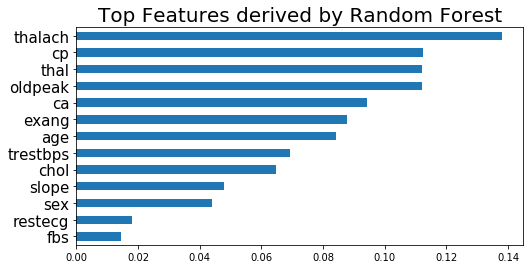

In [47]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(random_state=12, n_estimators=100)
rfc_model = rfc.fit(x, y)

(pd.Series(rfc_model.feature_importances_, index=x.columns)
    .nlargest(13)
    .plot(kind='barh', figsize=[8,4])
    .invert_yaxis())

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [48]:
selected_feature=x[['cp', 'trestbps','oldpeak','thal', 'ca','exang','age', 'trestbps','chol','slope', 'sex']]

In [49]:
selected_feature.head()

,cp,trestbps,oldpeak,thal,ca,exang,age,trestbps,chol,slope,sex
0,2,140,0.8,2,1,0,65,140,417,2,0
1,0,122,0.0,2,0,0,48,122,222,2,1
2,2,172,0.5,3,0,0,52,172,199,2,1
3,2,118,0.3,2,1,0,44,118,242,1,0
4,1,130,0.0,2,1,0,57,130,236,1,0


In [50]:
a=x[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg']]
b=x[['thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]

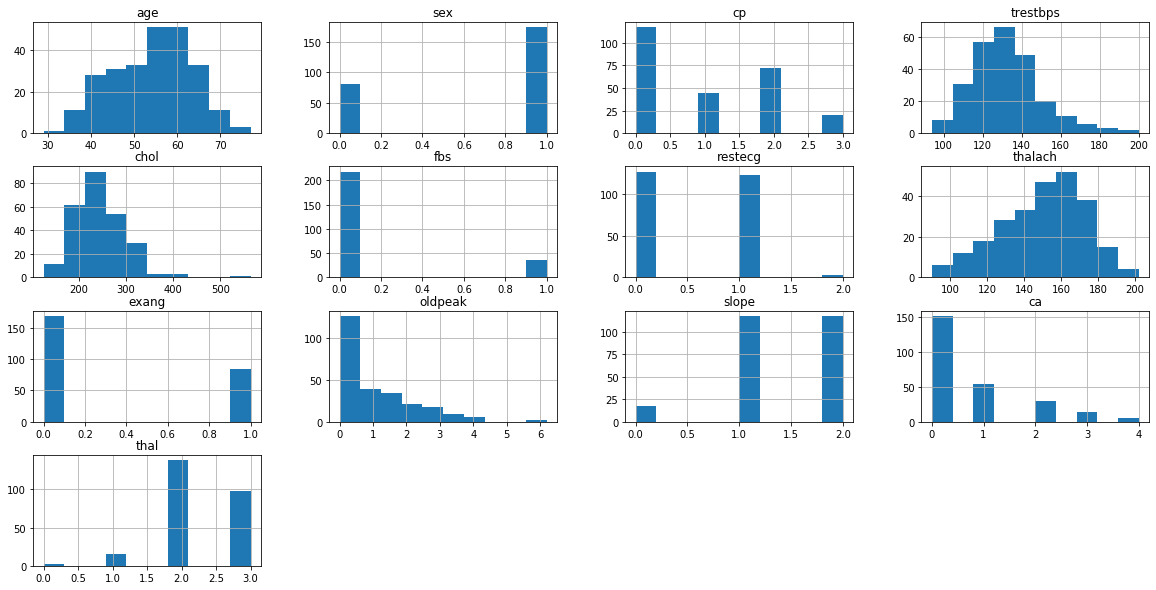

In [102]:

import pandas
plt.rcParams["figure.figsize"] = (20,10)
x.hist()
plt.show()

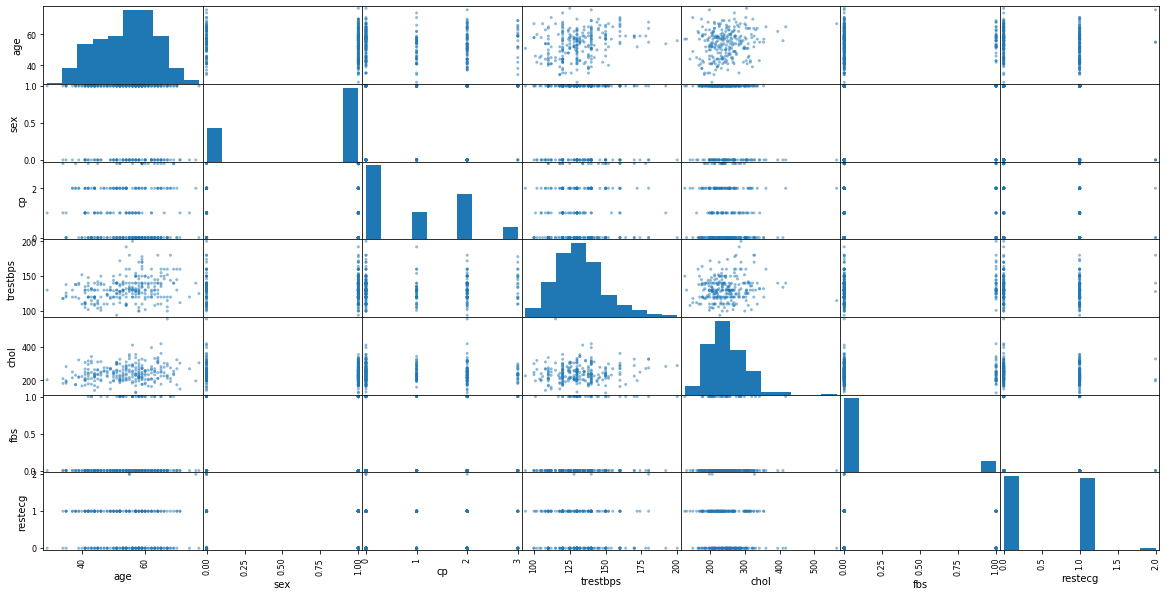

In [110]:
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"] = (20,10)
scatter_matrix(a)
plt.show()

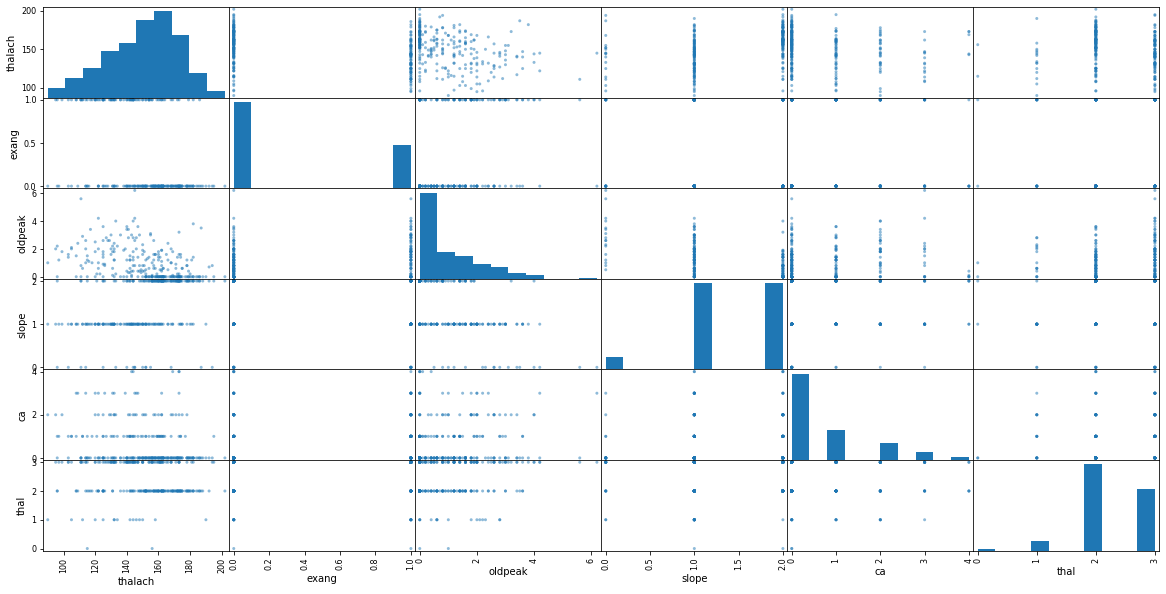

In [111]:
from pandas.plotting import scatter_matrix
plt.rcParams["figure.figsize"] = (20,10)
scatter_matrix(b)
plt.show()

In [113]:
df.corr(method ='pearson')

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
ID,1.000000,0.172234,0.198785,-0.348018,0.121732,-0.012450,0.010519,0.008488,-0.412642,0.397218,0.290046,-0.257103,0.375470,0.269244,-0.866391
age,0.172234,1.000000,-0.097568,-0.047036,0.269714,0.193554,0.100004,-0.114881,-0.416952,0.123058,0.221756,-0.166574,0.262633,0.060891,-0.234145
sex,0.198785,-0.097568,1.000000,-0.013036,-0.026716,-0.181231,0.100135,-0.084655,0.015444,0.136478,0.096863,-0.028669,0.137520,0.220136,-0.318666
cp,-0.348018,-0.047036,-0.013036,1.000000,0.064463,-0.049294,0.118727,0.033345,0.272585,-0.434243,-0.120185,0.093984,-0.123558,-0.176697,0.397858
trestbps,0.121732,0.269714,-0.026716,0.064463,1.000000,0.107065,0.169342,-0.072283,-0.079355,0.067098,0.206615,-0.122464,0.097582,0.031946,-0.167177
chol,-0.012450,0.193554,-0.181231,-0.049294,0.107065,1.000000,-0.015226,-0.135582,-0.003785,0.101345,0.015427,0.008472,0.018424,0.096053,-0.035225
fbs,0.010519,0.100004,0.100135,0.118727,0.169342,-0.015226,1.000000,-0.106056,-0.000066,0.033534,0.049006,-0.093053,0.088327,-0.072892,-0.021886
restecg,0.008488,-0.114881,-0.084655,0.033345,-0.072283,-0.135582,-0.106056,1.000000,0.067636,-0.061454,-0.053963,0.117369,-0.091516,0.021055,0.108372
thalach,-0.412642,-0.416952,0.015444,0.272585,-0.079355,-0.003785,-0.000066,0.067636,1.000000,-0.395844,-0.364818,0.415242,-0.221814,-0.101264,0.440193
exang,0.397218,0.123058,0.136478,-0.434243,0.067098,0.101345,0.033534,-0.061454,-0.395844,1.000000,0.305029,-0.254278,0.148762,0.200907,-0.479824


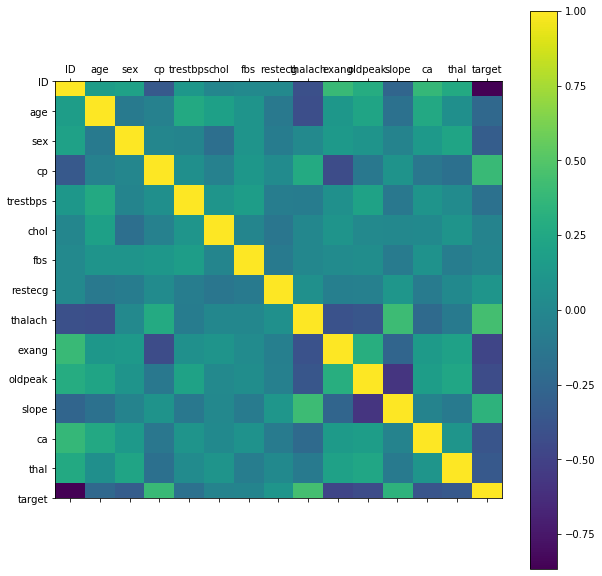

In [114]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [116]:
corr=x.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.097568,-0.047036,0.269714,0.193554,0.100004,-0.114881,-0.416952,0.123058,0.221756,-0.166574,0.262633,0.060891
sex,-0.097568,1.000000,-0.013036,-0.026716,-0.181231,0.100135,-0.084655,0.015444,0.136478,0.096863,-0.028669,0.137520,0.220136
cp,-0.047036,-0.013036,1.000000,0.064463,-0.049294,0.118727,0.033345,0.272585,-0.434243,-0.120185,0.093984,-0.123558,-0.176697
trestbps,0.269714,-0.026716,0.064463,1.000000,0.107065,0.169342,-0.072283,-0.079355,0.067098,0.206615,-0.122464,0.097582,0.031946
chol,0.193554,-0.181231,-0.049294,0.107065,1.000000,-0.015226,-0.135582,-0.003785,0.101345,0.015427,0.008472,0.018424,0.096053
fbs,0.100004,0.100135,0.118727,0.169342,-0.015226,1.000000,-0.106056,-0.000066,0.033534,0.049006,-0.093053,0.088327,-0.072892
restecg,-0.114881,-0.084655,0.033345,-0.072283,-0.135582,-0.106056,1.000000,0.067636,-0.061454,-0.053963,0.117369,-0.091516,0.021055
thalach,-0.416952,0.015444,0.272585,-0.079355,-0.003785,-0.000066,0.067636,1.000000,-0.395844,-0.364818,0.415242,-0.221814,-0.101264
exang,0.123058,0.136478,-0.434243,0.067098,0.101345,0.033534,-0.061454,-0.395844,1.000000,0.305029,-0.254278,0.148762,0.200907
oldpeak,0.221756,0.096863,-0.120185,0.206615,0.015427,0.049006,-0.053963,-0.364818,0.305029,1.000000,-0.575930,0.175787,0.241014


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

target=y
seed = 42  
#x=selected_feature  
X_train, X_val, y_train, y_val= train_test_split(x,y,test_size=0.20, random_state=seed, stratify=target)


In [19]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [488]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 0.01]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=5, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.912
Accuracy score (validation): 0.923
Learning rate:  0.075
Accuracy score (training): 0.934
Accuracy score (validation): 0.923
Learning rate:  0.1
Accuracy score (training): 0.965
Accuracy score (validation): 0.923
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.808
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.808
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.808
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.731
Learning rate:  0.01
Accuracy score (training): 0.859
Accuracy score (validation): 0.962


In [515]:
gb_clf = GradientBoostingClassifier(n_estimators=95, learning_rate=0.05, max_features=None, max_depth=2, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=95,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [516]:
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Accuracy score (training): 0.925
Accuracy score (validation): 0.923


[0.05696043 0.04925594 0.07651532 0.02678322 0.03313512 0.
 0.00188695 0.11023389 0.16689558 0.07712902 0.0334028  0.18764314
 0.18015859]


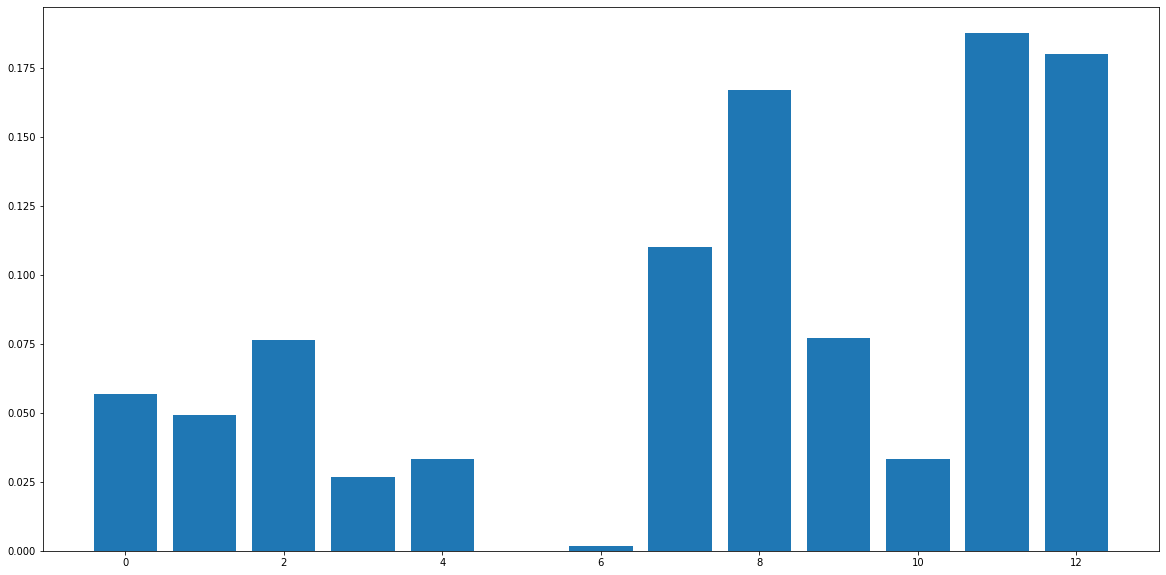

In [266]:
from matplotlib import pyplot

# feature importance
print(gb_clf.feature_importances_)
# plot
pyplot.bar(range(len(gb_clf.feature_importances_)),gb_clf.feature_importances_)
pyplot.show()

In [112]:
print(gb_clf.feature_importances_)

[0.05696043 0.04925594 0.07651532 0.02678322 0.03313512 0.
 0.00188695 0.11023389 0.16689558 0.07712902 0.0334028  0.18764314
 0.18015859]


In [235]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [236]:
print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_val, y_val)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.885


In [517]:
#for kagol compitition
X_train = scaler.fit_transform(x)

gb_clf = GradientBoostingClassifier(n_estimators=95, learning_rate=0.05, max_features=None, max_depth=2, random_state=42)
gb_clf.fit(X_train, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=95,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [518]:
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y)))

Accuracy score (training): 0.925


In [737]:
df_test=df_test.drop("ID",axis=1)

test = scaler.fit_transform(df_test)
results =gb_clf.predict(test)

In [520]:
results

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1])

In [522]:
scr = [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1]
   
# dictionary of lists  
dict = {'target': scr}  
     
final_result = pd.DataFrame(dict) 
  
# saving the dataframe 
final_result.to_csv('prediction2.csv', header=True, index=False) 

In [523]:
import collections, numpy
collections.Counter(y)

Counter({1: 137, 0: 116})

In [545]:
from sklearn.ensemble import AdaBoostClassifier
seed=3
#train_x,test_x,train_y,test_y=train_test_split(data_X,data_Y,test_size=0.20, random_state=seed, stratify=target)
from sklearn import preprocessing
x=preprocessing.normalize(x)
#test_x=preprocessing.normalize(x)


clf = AdaBoostClassifier(n_estimators=50, random_state=0,learning_rate=0.1)
clf.fit(x,y)
#predictions_train=clf.predict(train_x)

#predictions_test=clf.predict(test_x)

print('\nTraining Accuracy :', clf.score(x,y))



Training Accuracy : 0.8814229249011858


In [638]:
import collections, numpy
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import cross_val_score
r=RandomForestClassifier(n_estimators=500, random_state=0)
r.fit(x,y)
print('accuracy=',r.score(x,y))

r.fit(X_train, y_train)

print("Accuracy score (training): {0:.3f}".format(r.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(r.score(X_val, y_val)))



accuracy= 1.0
Accuracy score (training): 1.000
Accuracy score (validation): 0.962


In [639]:
#df_test=df_test.drop("ID",axis=1)
df_test=df_test.drop("ID",axis=1)
test = scaler.fit_transform(df_test)
results =r.predict(test)
results


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1])

In [640]:
scr = [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1]

# scr = [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
#        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
#        0, 1, 0, 0, 0, 1]
   
# dictionary of lists  
dict = {'target': scr}  
     
final_result = pd.DataFrame(dict) 
  
# saving the dataframe 
final_result.to_csv('prediction2.csv', header=True, index=False) 

In [641]:
np.array_equal(scr, results)

False

In [673]:
from sklearn.svm import SVC
xx = scaler.fit_transform(x)
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#grid.fit(train_x, train_y)
grid.fit(tr_d, te_d)
print(grid.best_estimator_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/home/walid/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/walid/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [65]:
from sklearn.svm import SVC
s=svclassifier = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)



In [66]:
xx=scaler.fit_transform(x)
svclassifier.fit(xx, y)


# print('\nTraining Accuracy :', s.score(X_train, y_train))

# print('\nTest Accuracy :', s.score(X_val, y_val))

print('\nTraining Accuracy :', s.score(x,y))



Training Accuracy : 0.4624505928853755


In [777]:
df_test=df_test.drop("ID",axis=1)
test = scaler.fit_transform(df_test)
results =svclassifier.predict(test)
results



array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1])

In [778]:
scr = [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1]

# scr = [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
#        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
#        0, 1, 0, 0, 0, 1]
   
# dictionary of lists  
dict = {'target': scr}  
     
final_result = pd.DataFrame(dict) 
  
# saving the dataframe 
final_result.to_csv('prediction2.csv', header=True, index=False) 

In [81]:
#current
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

seed=3
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20, random_state=seed, stratify=target)

from sklearn import preprocessing
#train_x=preprocessing.normalize(train_x)
#test_x=preprocessing.normalize(test_x)
train_x=preprocessing.scale(train_x)
test_x=preprocessing.scale(test_x)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#train_x = sc.fit_transform(train_x)



In [108]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [109]:
abalone_model = tf.keras.Sequential([
  layers.Dense(100),
  layers.Dense(50)
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.BinaryCrossentropy(),
                      optimizer = tf.optimizers.Adam())


SyntaxError: invalid syntax (<ipython-input-109-a5a12ffa868b>, line 4)

In [103]:
abalone_features = np.array(x)
abalone_features

array([[65.,  0.,  2., ...,  2.,  1.,  2.],
       [48.,  1.,  0., ...,  2.,  0.,  2.],
       [52.,  1.,  2., ...,  2.,  0.,  3.],
       ...,
       [62.,  1.,  1., ...,  2.,  0.,  2.],
       [60.,  1.,  0., ...,  1.,  1.,  3.],
       [52.,  1.,  1., ...,  2.,  0.,  2.]])

In [105]:
abalone_labels = np.array(y)

In [106]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)


Train on 253 samples
Epoch 1/10
253/253 [==============================] - 0s 984us/sample - loss: 7.0404
Epoch 2/10
253/253 [==============================] - 0s 44us/sample - loss: 7.0303
Epoch 3/10
253/253 [==============================] - 0s 55us/sample - loss: 7.0303
Epoch 4/10
253/253 [==============================] - 0s 73us/sample - loss: 7.0303
Epoch 5/10
253/253 [==============================] - 0s 86us/sample - loss: 7.0303
Epoch 6/10
253/253 [==============================] - 0s 69us/sample - loss: 7.0303
Epoch 7/10
253/253 [==============================] - 0s 96us/sample - loss: 7.0303
Epoch 8/10
253/253 [==============================] - 0s 87us/sample - loss: 7.0303
Epoch 9/10
253/253 [==============================] - 0s 79us/sample - loss: 7.0303
Epoch 10/10
253/253 [==============================] - 0s 86us/sample - loss: 7.0303


In [113]:
import numpy as np # linear algebra
import pandas as pd

ds=pd.read_csv("/home/walid/ML challenge/heart.csv")

In [134]:
ds.iloc[[28,56,8,146], :].values

array([[ 65. ,   0. ,   2. , 140. , 417. ,   1. ,   0. , 157. ,   0. ,
          0.8,   2. ,   1. ,   2. ,   1. ],
       [ 48. ,   1. ,   0. , 122. , 222. ,   0. ,   0. , 186. ,   0. ,
          0. ,   2. ,   0. ,   2. ,   1. ],
       [ 52. ,   1. ,   2. , 172. , 199. ,   1. ,   1. , 162. ,   0. ,
          0.5,   2. ,   0. ,   3. ,   1. ],
       [ 44. ,   0. ,   2. , 118. , 242. ,   0. ,   1. , 149. ,   0. ,
          0.3,   1. ,   1. ,   2. ,   1. ]])

In [135]:
29	65	0	2	140	417	1	0	157	0	0.8	2	1	2	1
57	48	1	0	122	222	0	0	186	0	0	2	0	2	1
9	52	1	2	172	199	1	1	162	0	0.5	2	0	3	1
147	44	0	2	118	242	0	1	149	0	0.3	1	1	2	1
303	57	0	1	130	236	0	0	174	0	0	1	1	2	0


SyntaxError: invalid syntax (<ipython-input-135-3f3b8ef88f09>, line 1)

In [124]:
ts=pd.read_csv("/home/walid/ML challenge/Test.csv")

In [127]:
Id=ts.ID

In [136]:
Id=Id-1
Id


0     127
1     231
2     219
3     183
4      24
5      55
6      27
7     124
8     138
9      66
10     36
11    213
12     11
13    126
14     52
15    224
16     16
17    182
18     86
19    197
20    291
21     74
22    272
23    185
24     81
25    150
26    260
27    236
28    243
29    192
30    160
31     60
32    265
33    252
34     35
35    162
36    193
37    268
38    220
39     18
40    167
41     97
42     14
43    102
44    152
45    145
46     23
47    139
48    187
49    230
Name: ID, dtype: int64

In [138]:
final_res =ds.iloc[Id, :].values

In [146]:
f=final_res[:,13]

In [148]:
f=np.array(f)

In [150]:
f

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [152]:
src=[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]

# scr = [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
#        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
#        0, 1, 0, 0, 0, 1]
   
# dictionary of lists  
dict = {'target': src}  
     
final_result = pd.DataFrame(dict) 
  
# saving the dataframe 
final_result.to_csv('prediction3.csv', header=True, index=False) 